In [1]:
import noise
import gym
import matplotlib.pyplot as plt
import numpy as np




env = gym.make("CarRacing-v0")
from pyglet import gl
import cProfile
_ = env.reset()

runs = []

Track generation: 1093..1370 -> 277-tiles track


In [18]:
#cProfile.run("[env.step(env.action_space.sample()) for _ in range(1000)]", sort="cumtime")

Track generation: 1148..1439 -> 291-tiles track
CPU times: user 978 ms, sys: 162 ms, total: 1.14 s
Wall time: 1.32 s


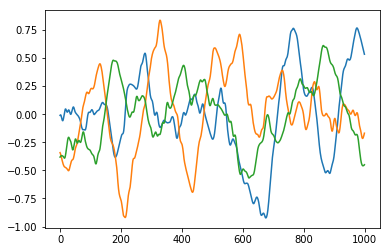

In [144]:
%%time
class Run:
    def __init__(self):
        self.obs_l = []
        self.reward_l = []
        self.action_l = []
    
from noise import pnoise1
def makeActionArray():
    start = np.random.random(3) * 10000
    out = []
    for _ in range(1000):
        action = [ 1.7 * pnoise1(_ / 200 + start_i, 5) for start_i in start]
        out.append(action)
    return np.array(out)
al = makeActionArray()
plt.plot(al)


def randomRun(sparse = False, encoded=True):
    _ = env.reset()
    done = False
    run = Run()

    run.action_l = makeActionArray()
    #action = env.action_space.sample()
    i = 0
    while not done:
        action = run.action_l[i]
        i += 1
        obs, reward, done, _ = env.step(action)
        #action_l.append(action)
        if(i % 10 == 0 or not sparse):
            run.obs_l.append(obs)
        run.reward_l.append(reward)
        if (len(run.reward_l) % 280 == 0):
            env.render()
    if encoded:
        run.obs_l = vae.encoder.predict(np.array(run.obs_l) / 255.)
    return run

run = randomRun()

In [41]:
%%time
runs = [randomRun() for _ in range(400)]

Track generation: 1107..1388 -> 281-tiles track
Track generation: 1127..1419 -> 292-tiles track
Track generation: 1249..1572 -> 323-tiles track
Track generation: 1204..1509 -> 305-tiles track
Track generation: 1181..1480 -> 299-tiles track
Track generation: 1127..1413 -> 286-tiles track
Track generation: 1184..1488 -> 304-tiles track
Track generation: 1149..1441 -> 292-tiles track
Track generation: 1040..1304 -> 264-tiles track
Track generation: 1164..1459 -> 295-tiles track
Track generation: 1072..1344 -> 272-tiles track
Track generation: 1185..1485 -> 300-tiles track
Track generation: 1163..1458 -> 295-tiles track
Track generation: 1288..1614 -> 326-tiles track
Track generation: 1195..1498 -> 303-tiles track
Track generation: 1427..1788 -> 361-tiles track
Track generation: 1067..1344 -> 277-tiles track
Track generation: 1179..1478 -> 299-tiles track
Track generation: 941..1180 -> 239-tiles track
Track generation: 1244..1559 -> 315-tiles track
Track generation: 1380..1729 -> 349-tiles

Track generation: 1021..1280 -> 259-tiles track
Track generation: 1099..1378 -> 279-tiles track
Track generation: 1184..1484 -> 300-tiles track
Track generation: 1027..1288 -> 261-tiles track
Track generation: 1159..1453 -> 294-tiles track
Track generation: 1372..1722 -> 350-tiles track
Track generation: 1171..1468 -> 297-tiles track
Track generation: 1260..1579 -> 319-tiles track
Track generation: 1289..1615 -> 326-tiles track
Track generation: 1079..1353 -> 274-tiles track
Track generation: 1031..1298 -> 267-tiles track
Track generation: 1180..1479 -> 299-tiles track
Track generation: 1213..1520 -> 307-tiles track
Track generation: 1107..1388 -> 281-tiles track
Track generation: 1137..1433 -> 296-tiles track
Track generation: 1201..1505 -> 304-tiles track
Track generation: 1127..1413 -> 286-tiles track
Track generation: 1098..1383 -> 285-tiles track
Track generation: 1277..1600 -> 323-tiles track
Track generation: 952..1194 -> 242-tiles track
Track generation: 1091..1368 -> 277-tiles

Track generation: 1285..1610 -> 325-tiles track
Track generation: 1021..1279 -> 258-tiles track
Track generation: 999..1259 -> 260-tiles track
Track generation: 1205..1510 -> 305-tiles track
Track generation: 1160..1454 -> 294-tiles track
Track generation: 1237..1550 -> 313-tiles track
Track generation: 1162..1457 -> 295-tiles track
Track generation: 1155..1452 -> 297-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1260..1579 -> 319-tiles track
Track generation: 1134..1421 -> 287-tiles track
Track generation: 1083..1358 -> 275-tiles track
Track generation: 1107..1388 -> 281-tiles track
Track generation: 1284..1609 -> 325-tiles track
Track generation: 1012..1269 -> 257-tiles track
Track generation: 1111..1394 -> 283-tiles track
Track generation: 1055..1323 -> 268-tiles track
Track generation: 1293..1620 -> 327-tiles track
Track generation: 1127..1413 -> 286-tiles track
Track generation: 1108..1389 -> 281-tiles track
Track generation:

In [42]:
obs_array = np.concatenate([r.obs_l for r in runs])

In [43]:
obs_array.shape

(39636, 96, 96, 3)

In [44]:
import pickle
pickle.dump(obs_array, open("some_frames", "wb"))

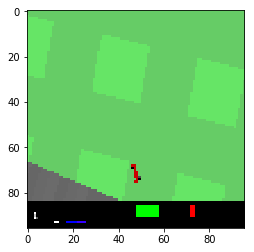

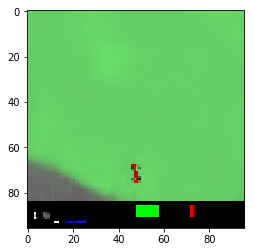

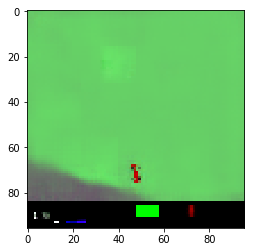

In [148]:
j = np.random.randint(10000)
plt.imshow(obs_array[j])
plt.show()
encoded = vae.encoder.predict(np.array(obs_array[j:j+1] / 255.))
plt.imshow(vae.decoder.predict(encoded[0])[0])
plt.show()
plt.imshow(vae.decoder.predict(encoded[2])[0])
plt.show()

In [157]:
runs = [randomRun() for _ in range(400)]

Track generation: 1165..1460 -> 295-tiles track
Track generation: 1260..1580 -> 320-tiles track
Track generation: 1043..1313 -> 270-tiles track
Track generation: 1049..1322 -> 273-tiles track
Track generation: 1142..1432 -> 290-tiles track
Track generation: 1193..1495 -> 302-tiles track
Track generation: 973..1225 -> 252-tiles track
Track generation: 1189..1490 -> 301-tiles track
Track generation: 1132..1419 -> 287-tiles track
Track generation: 1163..1463 -> 300-tiles track
Track generation: 1151..1443 -> 292-tiles track
Track generation: 1150..1442 -> 292-tiles track
Track generation: 1035..1301 -> 266-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1275..1598 -> 323-tiles track
Track generation: 1230..1542 -> 312-tiles track
Track generation: 1088..1364 -> 276-tiles track
Track generation: 1227..1538 -> 311-tiles track
Track generation: 1240..1554 -> 314-tiles track
Track generation: 1097..1375 -> 278-tiles track
Track generation:

Track generation: 1264..1584 -> 320-tiles track
Track generation: 1119..1403 -> 284-tiles track
Track generation: 1163..1458 -> 295-tiles track
Track generation: 1191..1492 -> 301-tiles track
Track generation: 1248..1565 -> 317-tiles track
Track generation: 1255..1585 -> 330-tiles track
Track generation: 1354..1697 -> 343-tiles track
Track generation: 1180..1479 -> 299-tiles track
Track generation: 1037..1300 -> 263-tiles track
Track generation: 1095..1373 -> 278-tiles track
Track generation: 1229..1540 -> 311-tiles track
Track generation: 1093..1379 -> 286-tiles track
Track generation: 1233..1545 -> 312-tiles track
Track generation: 1084..1359 -> 275-tiles track
Track generation: 1151..1443 -> 292-tiles track
Track generation: 1067..1343 -> 276-tiles track
Track generation: 1098..1376 -> 278-tiles track
Track generation: 1105..1385 -> 280-tiles track
Track generation: 1066..1337 -> 271-tiles track
Track generation: 1215..1523 -> 308-tiles track
Track generation: 996..1251 -> 255-tiles

Track generation: 1091..1339 -> 248-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1191..1493 -> 302-tiles track
Track generation: 1260..1579 -> 319-tiles track
Track generation: 1016..1274 -> 258-tiles track
Track generation: 1142..1441 -> 299-tiles track
Track generation: 1111..1393 -> 282-tiles track
Track generation: 1231..1543 -> 312-tiles track
Track generation: 1248..1564 -> 316-tiles track
Track generation: 1258..1576 -> 318-tiles track
Track generation: 1109..1393 -> 284-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1244..1559 -> 315-tiles track
Track generation: 1123..1408 -> 285-tiles track
Track generation: 1091..1368 -> 277-tiles track
Track generation: 1000..1254 -> 254-tiles track
Track generation: 996..1249 -> 253-tiles track
Track generation: 1218..1536 -> 318-tiles track
Track generation: 1080..1360 -> 280-tiles track
Track generation: 1196..1499 -> 303-tiles

In [159]:
import cv2
decoded = vae.decoder.predict(runs[20].obs_l[0])
for im in decoded:
    cv2.imshow("hi", im)
    if cv2.waitKey(10) != -1:
        break

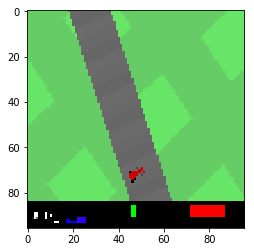

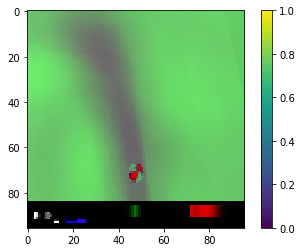

In [152]:
i = 1910
plt.imshow(obs_array[i].reshape((96, 96, 3)))
plt.show()
plt.imshow(np.clip( pca.inverse_transform(pca.transform(np.expand_dims(obs_array[i], 0))).reshape(96, 96, 3)/ 256, 0, 1))
plt.colorbar()

In [153]:
V_features = pca.transform(obs_array) / 9000

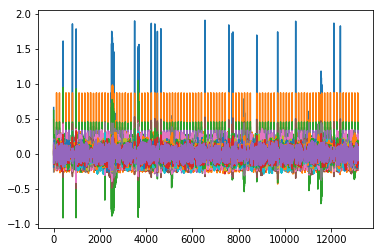

In [154]:
plt.plot(V_features)
plt.show()

In [20]:
import keras

Using TensorFlow backend.


In [21]:
aug_features = V_features
#aug_features = np.concatenate([V_features, V_features**2, V_features**3], -1)

In [22]:
aug_features = np.concatenate([aug_features[2:], aug_features[1:-1], aug_features[:-2]], -1)

In [36]:
policy_maker = lambda: np.random.random((50, 3)) - .5

In [24]:
policy = policy_maker()

In [25]:
np.dot(aug_features[0], policy)

ValueError: shapes (45,) and (50,3) not aligned: 45 (dim 0) != 50 (dim 0)

-0.6043677771171636

In [174]:
gene_pool = [policy_maker() for _ in range(40)]

In [218]:
import random
for _ in range(90):
    scores = [runout(p) for p in gene_pool]
    print(scores)


    evaluated = list(sorted(zip(scores + np.random.random(40) / 10, gene_pool)))[-10:]
    evaluated = [i[1] for i in evaluated]
    
    gene_pool = evaluated
    
    for _ in range(30):
        mask = policy_maker() > 0
        g1 = random.choice(evaluated)
        g2 = random.choice(evaluated) + 1 - 1

        #g2[mask] = g1[mask]

        g2 += policy_maker() * .02
        gene_pool.append(g2)
    
    

Track generation: 1250..1575 -> 325-tiles track
Track generation: 1092..1369 -> 277-tiles track
Track generation: 1080..1354 -> 274-tiles track
Track generation: 1179..1478 -> 299-tiles track
Track generation: 1054..1322 -> 268-tiles track
Track generation: 969..1220 -> 251-tiles track
Track generation: 1140..1429 -> 289-tiles track
Track generation: 1216..1524 -> 308-tiles track
Track generation: 1207..1513 -> 306-tiles track
Track generation: 1176..1474 -> 298-tiles track
Track generation: 1112..1400 -> 288-tiles track
Track generation: 1100..1385 -> 285-tiles track
Track generation: 1299..1628 -> 329-tiles track
Track generation: 1044..1309 -> 265-tiles track
Track generation: 1069..1340 -> 271-tiles track
Track generation: 1185..1486 -> 301-tiles track
Track generation: 979..1235 -> 256-tiles track
Track generation: 1312..1644 -> 332-tiles track
Track generation: 1104..1384 -> 280-tiles track
Track generation: 940..1187 -> 247-tiles track
Track generation: 1289..1615 -> 326-tiles t

KeyboardInterrupt: 

In [160]:
evaluated = list(sorted(zip(scores + np.random.random(40) / 10, gene_pool)))[-10:]
evaluated = [i[1] for i in evaluated]

gene_pool = evaluated

for _ in range(30):
    mask = policy_maker() > 0
    g1 = random.choice(evaluated)
    g2 = random.choice(evaluated) + 1 - 1

    #g2[mask] = g1[mask]

    g2 += policy_maker() * .02
    gene_pool.append(g2)

In [77]:
np.random.random(20)

array([0.23048694, 0.96557548, 0.71694389, 0.50850258, 0.80545085,
       0.89574654, 0.36426529, 0.24523046, 0.25337754, 0.29945573,
       0.1508369 , 0.7156174 , 0.77365158, 0.32948993, 0.57689357,
       0.54130312, 0.96697075, 0.68908846, 0.78648644, 0.45079147])

In [213]:
import pickle
pickle.dump(pca, open("pca5", "wb") )

In [214]:
pickle.dump(obs_l, open("obs_l5", "wb"))

In [215]:
pickle.dump(gene_pool, open("gene_pool5", "wb"))
def normalize(vec):
    vec = vec - np.min(vec)
    vec /= np.max(vec
                 )
    return vec

In [4]:
def features(obs):
    V_features_now = pca.transform(np.array([obs.flatten()])) / 9000
    #aug_features = np.concatenate([V_features_now, V_features_now**2, V_features_now**3], -1)
    return V_features_now
env = gym.make("CarRacing-v0")
#def runout(policy):
action_l = []
for _ in range(200):
    obs = env.reset()
    V_features_now = features(obs)
    #print(V_features_now)
    done = False
    feature_stack = [V_features_now] * 3
    for _ in range(50):
        reward_l = []

        p_obs_l = []

        action_delta = (np.random.random(3) - .5) * .05
        for _ in range(20):

            processed_obs = np.concatenate([np.array(feature_stack[-3:]).flatten(), np.ones(5)])
            p_obs_l.append(processed_obs)
            


            action = np.tanh(np.dot(processed_obs, policy) + action_delta)
            action_l.append(action)

            obs, reward, done, _ = env.step(action)
            V_features_now = features(obs)
            action_l.append(action)
            #obs_l.append(obs)
            reward_l.append(reward)
            env.render()
            feature_stack.append(V_features_now)
        assigned_reward = np.convolve(.9**np.arange(50, 0, -1), reward_l, "full")[-len(reward_l):]
        print (np.sum(reward_l))
        print (policy)
        for i in range(20):
            reward = assigned_reward[i]
            contribs = policy * np.expand_dims(p_obs_l[i], -1)
            direction= action_delta

            policy -= reward * contribs * np.expand_dims(direction, 0)


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Track generation: 1226..1536 -> 310-tiles track


NameError: name 'pca' is not defined

In [122]:
assigned_reward = np.convolve(.9**np.arange(50, 0, -1), reward_l, "full")[-len(reward_l):]
for i in range(1000):
    reward = assigned_reward[i]
    contribs = policy * np.expand_dims(p_obs_l[i], -1)
    direction= action_delta_l[i]
    
    policy -= .01 * reward * contribs * np.expand_dims(direction, 0)

In [98]:
np.convolve?

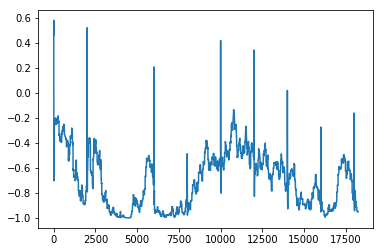

In [143]:
plt.plot(np.array(action_l)[:, 1])

In [3]:
list(np.arange(8))

[0, 1, 2, 3, 4, 5, 6, 7]

In [179]:
reward = [o[2] for o in obs_l]

In [91]:
reward = np.array(reward)

In [165]:
len(obs_l)

204

In [97]:
reward[:, 0]

IndexError: too many indices for array

In [200]:
reward = [np.sum(o[2]) for o in obs_l]
reward.append(0)

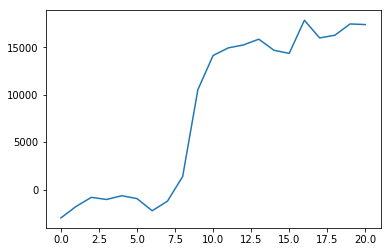

In [205]:
plt.plot(np.sum(np.array(reward).reshape((-1, 40)), 1))

In [193]:
os, actions, rewards = obs_l[751]

IndexError: list index out of range

In [194]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

#=========================================
# Create Fake Images using Numpy 
# You don't need this in your code as you have your own imageList.
# This is used as an example.

imageList = []
for i in range(0, 1000, 5):
    
    imageList.append(
        np.clip( pca.inverse_transform(os[i] * 9000).reshape(96, 96, 3)/ 256, 0, 1))

#=========================================
# Animate Fake Images (in Jupyter)

def getImageFromList(x):
    return imageList[x]

fig = plt.figure(figsize=(10, 10))
ims = []
for i in range(len(imageList)):
    im = plt.imshow(getImageFromList(i), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
plt.close()

# Show the animation
HTML(ani.to_html5_video())


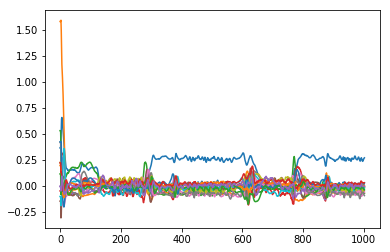

In [127]:
plt.plot([o[0] for o in os])

In [112]:
os[i]

array([[ 0.19291337, -0.0346628 ,  0.08440198,  0.02642714, -0.05258625,
         0.0262238 , -0.10580683, -0.00269644, -0.00999144, -0.00646848,
        -0.03352173, -0.03644801,  0.0042524 ,  0.04725756, -0.0674667 ]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


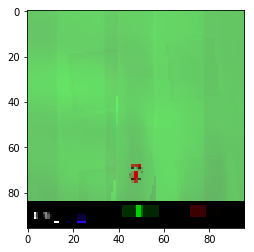

In [124]:
(plt.imshow(pca.inverse_transform(os[1000] * 9000).reshape(96, 96, 3) / 256) )

In [212]:
if 1:
    from pyglet.window import key
    a = np.array( [0.0, 0.0, 0.0] )
    def key_press(k, mod):
        global restart
        if k==0xff0d: restart = True
        if k==key.LEFT:  a[0] = -1.0
        if k==key.RIGHT: a[0] = +1.0
        if k==key.UP:    a[1] = +1.0
        if k==key.DOWN:  a[2] = +0.8   # set 1.0 for wheels to block to zero rotation
    def key_release(k, mod):
        if k==key.LEFT  and a[0]==-1.0: a[0] = 0
        if k==key.RIGHT and a[0]==+1.0: a[0] = 0
        if k==key.UP:    a[1] = 0
        if k==key.DOWN:  a[2] = 0
    env = env.unwrapped
    env.render()
    record_video = False
    if record_video:
        env.monitor.start('/tmp/video-test', force=True)
    env.viewer.window.on_key_press = key_press
    env.viewer.window.on_key_release = key_release
    while True:
        env.reset()
        total_reward = 0.0
        steps = 0
        restart = False
        while True:
            s, r, done, info = env.step(a)
            total_reward += r
            if steps % 200 == 0 or done:
                print("\naction " + str(["{:+0.2f}".format(x) for x in a]))
                print("step {} total_reward {:+0.2f}".format(steps, total_reward))
                #import matplotlib.pyplot as plt
                #plt.imshow(s)
                #plt.savefig("test.jpeg")
            steps += 1
            if not record_video: # Faster, but you can as well call env.render() every time to play full window.
                env.render()
            if done or restart: break
    env.close()


Track generation: 1206..1512 -> 306-tiles track

action ['+0.00', '+0.00', '+0.00']
step 0 total_reward +6.46

action ['+0.00', '+0.00', '+0.00']
step 200 total_reward +2.85

action ['-1.00', '+0.00', '+0.00']
step 400 total_reward +25.47

action ['+0.00', '+1.00', '+0.00']
step 600 total_reward +38.26

action ['+0.00', '+1.00', '+0.00']
step 800 total_reward +54.33

action ['+0.00', '+1.00', '+0.00']
step 1000 total_reward +57.28

action ['+1.00', '+0.00', '+0.00']
step 1200 total_reward +37.28

action ['+0.00', '+0.00', '+0.00']
step 1400 total_reward +17.28

action ['+0.00', '+0.00', '+0.00']
step 1600 total_reward -2.72

action ['+0.00', '+0.00', '+0.00']
step 1800 total_reward +19.90

action ['+0.00', '+0.00', '+0.00']
step 2000 total_reward +108.10

action ['+0.00', '+0.00', '+0.00']
step 2200 total_reward +186.46

action ['-1.00', '+0.00', '+0.00']
step 2400 total_reward +258.26

action ['-1.00', '+0.00', '+0.00']
step 2600 total_reward +320.23

action ['+1.00', '+0.00', '+0.00'

KeyboardInterrupt: 